## Prequirements

In [52]:
%pip install kagglehub pandas numpy matplotlib seaborn scikit-learn textblob

16523.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: /Users/0xdev/.pyenv/versions/3.12.2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Introduction
Twitter bot detection is crucial for:
- Preventing misinformation spread
- Protecting real users from spam
- Maintaining platform integrity

## Define the problem

- Nowsdays, Twitter (or X) has a lot of bots or fake accounts. These accounts are created to spread misinformation, spam, or manipulate the public opinion.
- The goal is to detect these bots and take action against them.

## Find a dataset

### Dataset Citation 📝

- Dataset: [Twitter Bot Detection Dataset](https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset)  
- Author: Goyal Aditya  
- Platform: Kaggle  
- Accessed: 2025-01-19

### Dataset Information 📊

The dataset is provided in a CSV file format named 'bot_detection_dataset.csv'. It includes the following columns:

- User ID: Unique identifier for each user in the dataset.
- Username: The username associated with the user.
- Tweet: The text content of the tweet.
- Retweet Count: The number of times the tweet has been retweeted.
- Mention Count: The number of mentions in the tweet.
- Follower Count: The number of followers the user has.
- Verified: A boolean value indicating whether the user is verified or not.
- Bot Label: A label indicating whether the user is a bot (1) or not (0).
- Location: The location associated with the user.
- Created At: The date and time when the tweet was created.
- Hashtags: The hashtags associated with the tweet.

## Data Exploration

### Citation
Dataset: [Twitter Bot Detection Dataset](https://www.kaggle.com/datasets/goyaladi/twitter-bot-detection-dataset)  
Author: Goyal Aditya  
Platform: Kaggle  
Accessed: 2025-01-19

Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.

## Download the dataset and load it

- Download the dataset from Kaggle

In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("goyaladi/twitter-bot-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/0xdev/.cache/kagglehub/datasets/goyaladi/twitter-bot-detection-dataset/versions/2


- Load the dataset using pandas

In [55]:
df = pd.read_csv(f'{path}/bot_detection_data.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [57]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [58]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [59]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='bot_label')
plt.title('Distribution of Bot vs Non-Bot Accounts')
plt.show()

ValueError: Could not interpret value `bot_label` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

### Data Cleaning, Handling Missing Values, and Feature Engineering

In [8]:
import string
from textblob import TextBlob
import re

df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df['location'] = df['location'].fillna('none').str.lower()
df['hashtags'] = df['hashtags'].fillna('none')
df['bot_label'] = df['bot_label'].astype(int)

df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_date'] = df['created_at'].dt.date
df['created_at_year'] = df['created_at'].dt.year
df['created_at_month'] = df['created_at'].dt.month
df['created_at_hour'] = df['created_at'].dt.hour
df['created_at_dayofweek'] = df['created_at'].dt.dayofweek
df['created_at_is_weekend'] = df['created_at_dayofweek'].isin([5, 6]).astype(int)
df['account_age_days'] = (pd.Timestamp.now() - df['created_at']).dt.days

df['username_length'] = df['username'].apply(len)
df['username_digit_count'] = df['username'].apply(lambda x: sum(c.isdigit() for c in x))
df['username_letter_count'] = df['username'].apply(lambda x: sum(c.isalpha() for c in x))
df['username_special_char_count'] = df['username'].apply(lambda x: sum(c in string.punctuation for c in x))
df['username_digit_ratio'] = df['username_digit_count'] / df['username_length'] * 100
df['username_has_bot_pattern'] = df['username'].str.contains(r'bot|b0t|robot|_bot_', case=False).astype(int)
df['username_has_repeating_chars'] = df['username'].apply(lambda x: bool(re.search(r'(.)\1{2,}', x))).astype(int)

df['tweet_length'] = df['tweet'].apply(len)
df['tweet_digit_count'] = df['tweet'].apply(lambda x: sum(c.isdigit() for c in x))
df['tweet_letter_count'] = df['tweet'].apply(lambda x: sum(c.isalpha() for c in x))
df['tweet_punctuation_count'] = df['tweet'].apply(lambda x: sum(c in string.punctuation for c in x))
df['tweet_digit_ratio'] = df['tweet_digit_count'] / df['tweet_length'] * 100
df['tweet_word_count'] = df['tweet'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['tweet_length'] / df['tweet_word_count']
df['tweet_capital_ratio'] = df['tweet'].apply(lambda x: sum(1 for c in x if c.isupper())) / df['tweet_length']
df['tweet_punctuation_count'] = df['tweet'].apply(lambda x: sum(c in string.punctuation for c in x))
df['tweet_punctuation_ratio'] = df['tweet_punctuation_count'] / df['tweet_length']

df['hashtags_length'] = df['hashtags'].apply(len)
df['hashtags_letter_count'] = df['hashtags'].apply(lambda x: sum(c.isalpha() for c in x))

df['retweet_follower_ratio'] = df['retweet_count'] / (df['follower_count'] + 1)  # Add 1 to avoid division by zero
df['mention_tweet_ratio'] = df['mention_count'] / df['tweet_length']
df['follower_mention_ratio'] = df['follower_count'] / (df['mention_count'] + 1)  # Add 1 to avoid division by zero
df['verified_follower_ratio'] = df['verified'] / (df['follower_count'] + 1)  # Add 1 to avoid division by zero


# tweet sentiment
df['sentiment_polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)



df.head()

,user_id,username,tweet,retweet_count,mention_count,follower_count,verified,bot_label,location,created_at,...,tweet_capital_ratio,tweet_punctuation_ratio,hashtags_length,hashtags_letter_count,retweet_follower_ratio,mention_tweet_ratio,follower_mention_ratio,verified_follower_ratio,sentiment_polarity,sentiment_subjectivity
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,adkinston,2020-05-11 15:29:50,...,0.012048,0.012048,4,4,0.036109,0.012048,1176.500000,0.000000,-0.050000,0.250000
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,sanderston,2022-11-26 05:18:10,...,0.012987,0.012987,9,8,0.005718,0.064935,1602.833333,0.000104,-0.100000,0.450000
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,harrisonfurt,2022-08-08 03:16:54,...,0.016393,0.016393,11,10,0.001375,0.032787,1454.333333,0.000229,0.000000,1.000000
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,martinezberg,2021-08-14 22:27:05,...,0.020408,0.020408,18,15,0.024075,0.102041,373.666667,0.000446,0.433333,0.733333
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,camachoville,2020-04-13 21:24:21,...,0.034483,0.034483,15,14,0.003081,0.103448,2109.500000,0.000000,0.700000,0.600000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  int64         
 1   username                      50000 non-null  object        
 2   tweet                         50000 non-null  object        
 3   retweet_count                 50000 non-null  int64         
 4   mention_count                 50000 non-null  int64         
 5   follower_count                50000 non-null  int64         
 6   verified                      50000 non-null  bool          
 7   bot_label                     50000 non-null  int64         
 8   location                      50000 non-null  object        
 9   created_at                    50000 non-null  datetime64[ns]
 10  hashtags                      50000 non-null  object        
 11  created_at_date             

### Drop Non-Numeric and Redundant Columns

The following columns are dropped to prepare the data for machine learning:

1. Non-numeric columns:
    - user_id 
    - username
    - tweet
    - location
    - hashtags
    - created_at
    - created_at_date

2. Redundant/low correlation features:
    - username_special_char_count
    - tweet_digit_count 
    - tweet_punctuation_count
    - tweet_digit_ratio
    - tweet_word_count
    - created_at_dayofweek
    - retweet_follower_ratio 
    - username_length
    - verified
    - created_at_year
    - username_letter_count
    - verified_follower_ratio
    - mention_tweet_ratio
    - hashtags_length
    - hashtags_letter_count
    - mention_count
    - username_digit_count
    - tweet_letter_count
    - follower_mention_ratio
    - sentiment_polarity 
    - created_at_hour
    - created_at_is_weekend
    - tweet_punctuation_ratio
    - retweet_count
    - follower_count
    - account_age_days
    - tweet_length

This data cleaning ensures we have purely numeric features with meaningful correlations for our machine learning models.

- Drop the non-numeric columns to ensure we have only numeric features for machine learning.

In [10]:
df = df.drop(columns=['user_id', 'username', 'tweet', 'location', 'hashtags', 'created_at', 'created_at_date'])

- Perform correlation analysis to identify features most strongly related to bot classification.

In [11]:
df.corr()['bot_label'].sort_values(ascending=False)

bot_label                       1.000000
sentiment_subjectivity          0.009542
username_has_repeating_chars    0.009375
username_has_bot_pattern        0.006312
created_at_month                0.006148
tweet_capital_ratio             0.005913
username_digit_ratio            0.005877
avg_word_length                 0.005365
username_digit_count            0.004316
follower_mention_ratio          0.002798
sentiment_polarity              0.002384
created_at_hour                 0.002227
created_at_is_weekend           0.001827
tweet_punctuation_ratio         0.001265
retweet_count                   0.001250
tweet_letter_count              0.001239
follower_count                  0.001162
account_age_days                0.000991
tweet_length                    0.000894
tweet_word_count               -0.001310
created_at_dayofweek           -0.001760
retweet_follower_ratio         -0.001989
username_length                -0.002308
verified                       -0.002640
created_at_year 

- Drop low correlation features to improve model performance.

In [12]:
df = df.drop(columns=['username_special_char_count', 'tweet_digit_count', 'tweet_punctuation_count', 'tweet_digit_ratio'])

In [13]:
df = df.drop(columns=['tweet_word_count', 'created_at_dayofweek', 'retweet_follower_ratio', 'username_length', 'verified', 'created_at_year', 'username_letter_count', 'verified_follower_ratio', 'mention_tweet_ratio', 'hashtags_length', 'hashtags_letter_count', 'mention_count'])

- Visualize the correlation matrix to understand feature relationships.

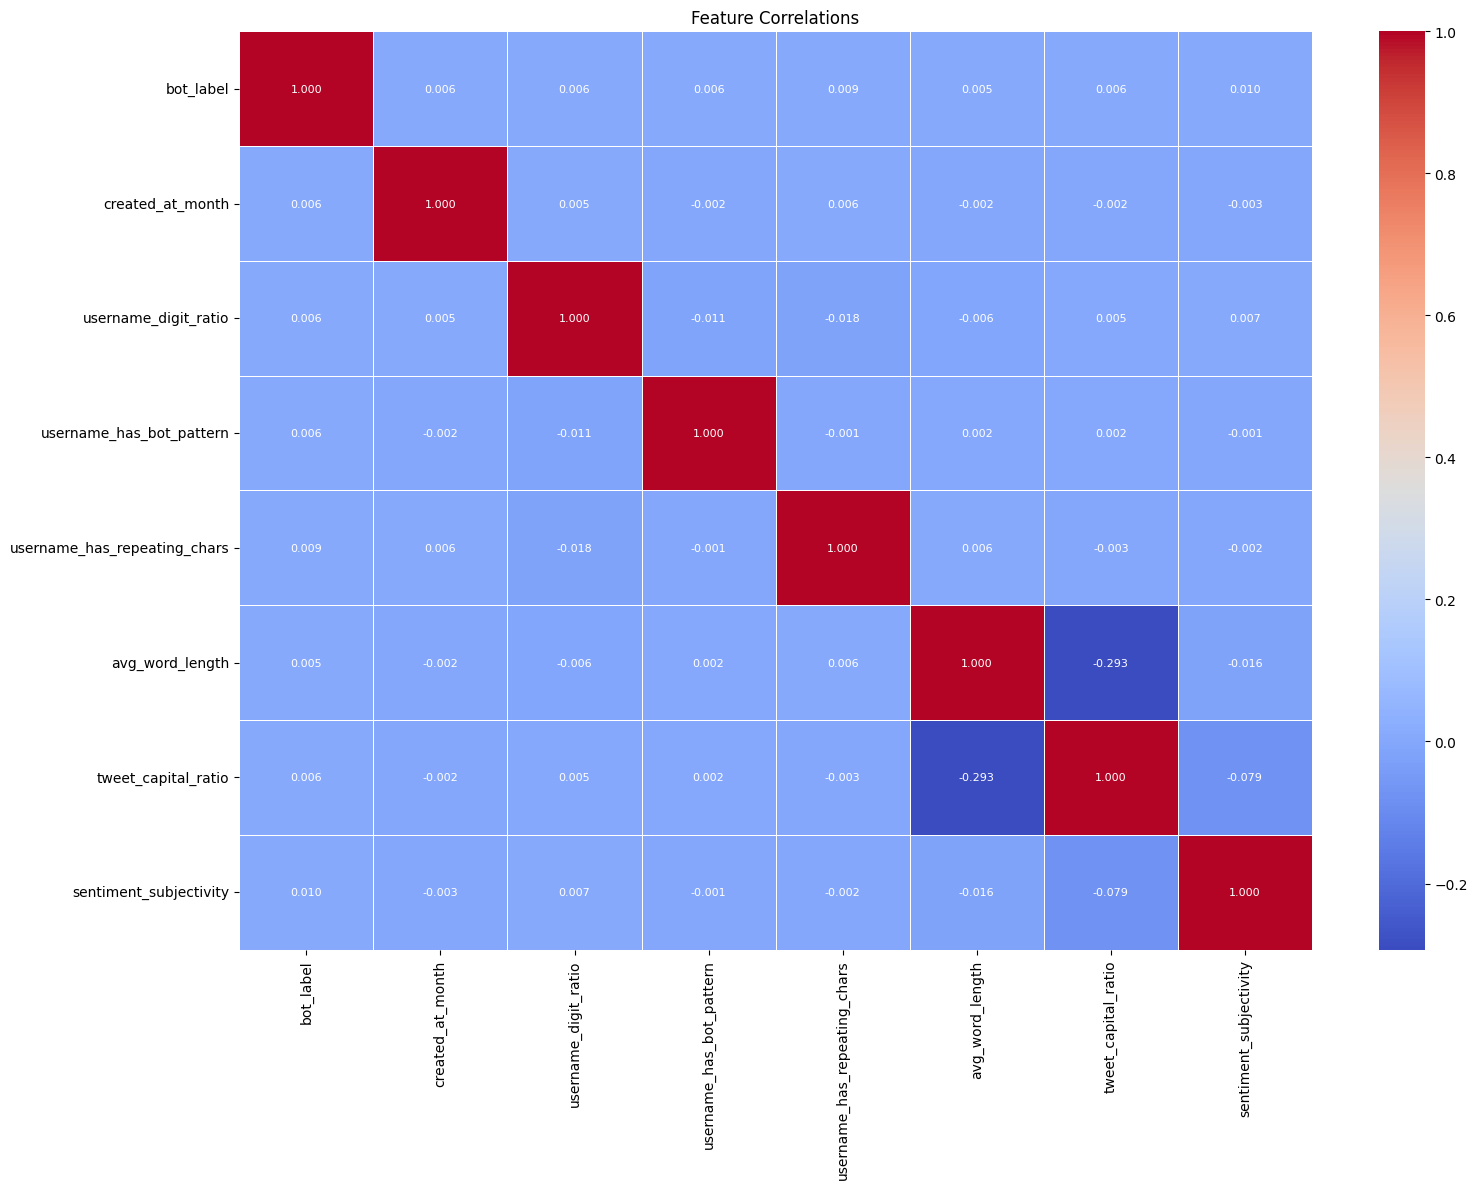

In [50]:
plt.figure(figsize=(16,12))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".3f", 
    linewidths=0.5, 
    annot_kws={"size": 8}
)
plt.title('Feature Correlations')
plt.tight_layout() 
plt.show()

- Remove redundant features.

In [15]:
df = df.drop(columns=['username_digit_count', 'tweet_letter_count'])

- Perform correlation analysis again and to remove any remaining low correlation features.

In [ ]:
df.corr()['bot_label'].sort_values(ascending=False)

bot_label                       1.000000
sentiment_subjectivity          0.009542
username_has_repeating_chars    0.009375
username_has_bot_pattern        0.006312
created_at_month                0.006148
tweet_capital_ratio             0.005913
username_digit_ratio            0.005877
avg_word_length                 0.005365
follower_mention_ratio          0.002798
sentiment_polarity              0.002384
created_at_hour                 0.002227
created_at_is_weekend           0.001827
tweet_punctuation_ratio         0.001265
retweet_count                   0.001250
follower_count                  0.001162
account_age_days                0.000991
tweet_length                    0.000894
Name: bot_label, dtype: float64

In [17]:
df = df.drop(columns=['follower_mention_ratio', 'sentiment_polarity', 'created_at_hour', 'created_at_is_weekend', 'tweet_punctuation_ratio', 'retweet_count', 'follower_count', 'account_age_days', 'tweet_length'])

In [18]:
df.describe()

,bot_label,created_at_month,username_digit_ratio,username_has_bot_pattern,username_has_repeating_chars,avg_word_length,tweet_capital_ratio,sentiment_subjectivity
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.500360,6.073360,6.534027,0.00036,0.001020,6.543732,0.018826,0.360060
std,0.500005,3.465744,11.469729,0.01897,0.031921,0.679283,0.008063,0.270404
min,0.000000,1.000000,0.000000,0.00000,0.000000,3.833333,0.008475,0.000000
25%,0.000000,3.000000,0.000000,0.00000,0.000000,6.090909,0.013514,0.112500
50%,1.000000,6.000000,0.000000,0.00000,0.000000,6.500000,0.016667,0.366667
75%,1.000000,9.000000,16.666667,0.00000,0.000000,7.000000,0.021739,0.525000
max,1.000000,12.000000,50.000000,1.00000,1.000000,10.000000,0.147059,1.000000


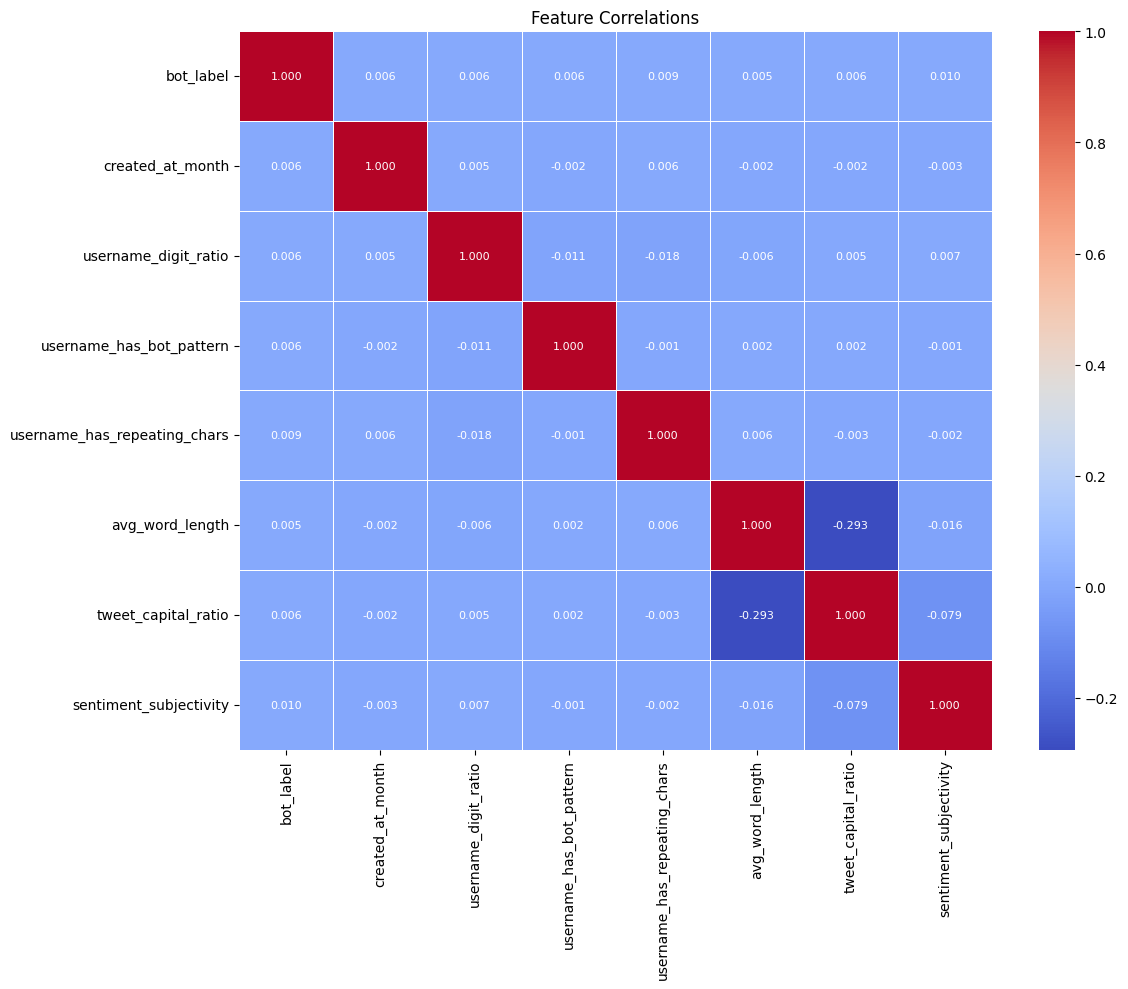

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".3f", 
    linewidths=0.5, 
    annot_kws={"size": 8}
)
plt.title('Feature Correlations')
plt.tight_layout() 
plt.show()

## Split the Data into Training and Testing Sets

In [20]:
X = df.drop(columns=['bot_label'])
y = df['bot_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# print the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 7)
X_test shape: (10000, 7)
y_train shape: (40000,)
y_test shape: (10000,)


## Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define models
models = {
    'LogisticRegression': LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42),
    'RBF_SVC': SVC(kernel='rbf', random_state=42),
    'LinearSVC': LinearSVC(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()

Model: LogisticRegression
accuracy: 0.5029
precision: 0.5065
recall: 0.4692
roc_auc: 0.5031

Model: RBF_SVC
accuracy: 0.5012
precision: 0.5050
recall: 0.4386
roc_auc: 0.5016

Model: LinearSVC
accuracy: 0.5024
precision: 0.5063
recall: 0.4505
roc_auc: 0.5027



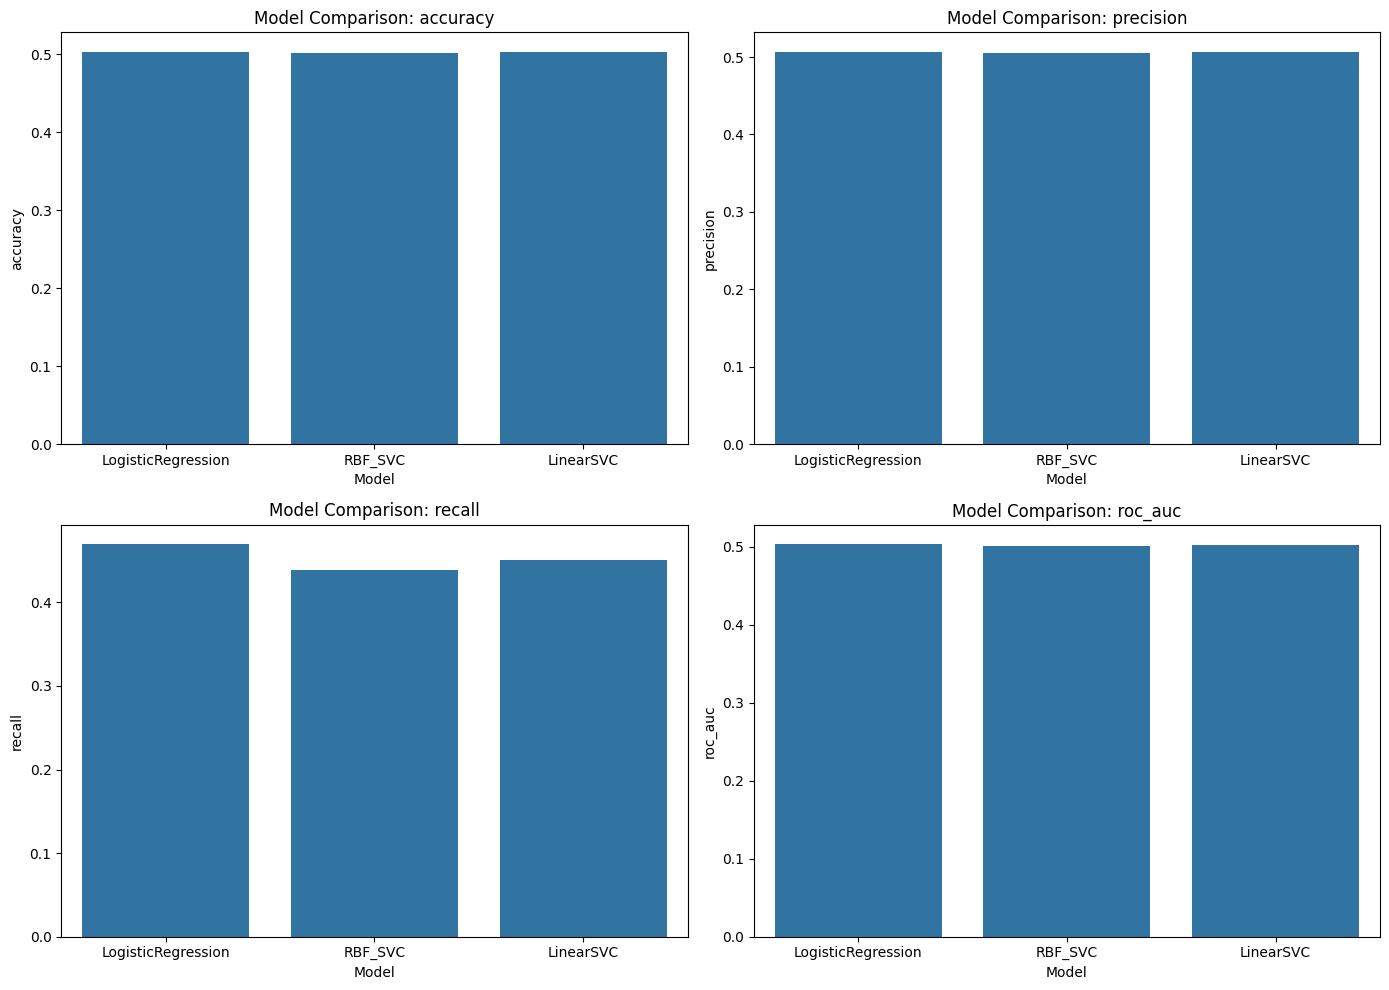

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Plot the results
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax)
    ax.set_title(f'Model Comparison: {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')

plt.tight_layout()
plt.show()

## Tune the hyperparameters of the Logistic Regression model

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Use 'elasticnet' if solver='saga'
    'solver': ['liblinear', 'saga'],  # Depending on penalty type
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.5038


## Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(class_weight="balanced", solver="saga", random_state=42, C=0.1, penalty='l1')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.5043
Precision: 0.5080316984364961
Recall: 0.4713831478537361
ROC AUC: 0.5045120248125363


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not Bot (0)', 'Bot (1)']))

              precision    recall  f1-score   support

     Not Bot       0.50      0.54      0.52      4968
         Bot       0.51      0.47      0.49      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



## Use cross-validation to evaluate the model

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

Cross-validation scores: [0.501  0.504  0.4894 0.5056 0.5103]
Mean accuracy: 0.50206


### Visualize the results

- ROC curve shows the trade-off between sensitivity and specificity
- Confusion matrix displays true/false positives/negatives
- Feature importance plot shows which features have the strongest impact on predictions

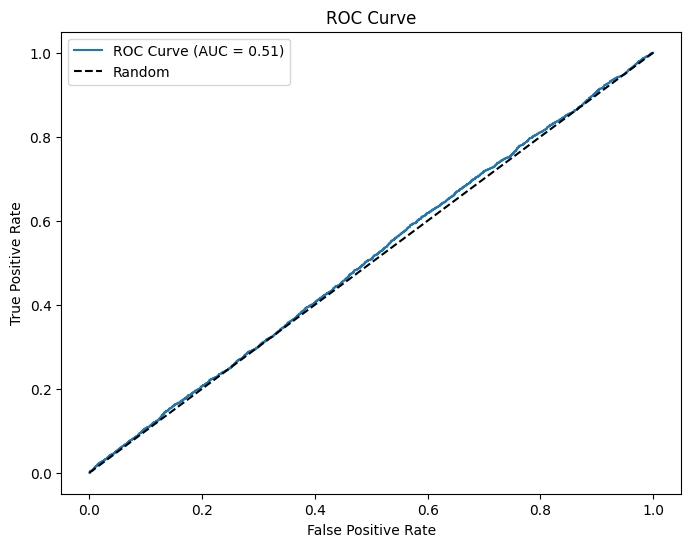

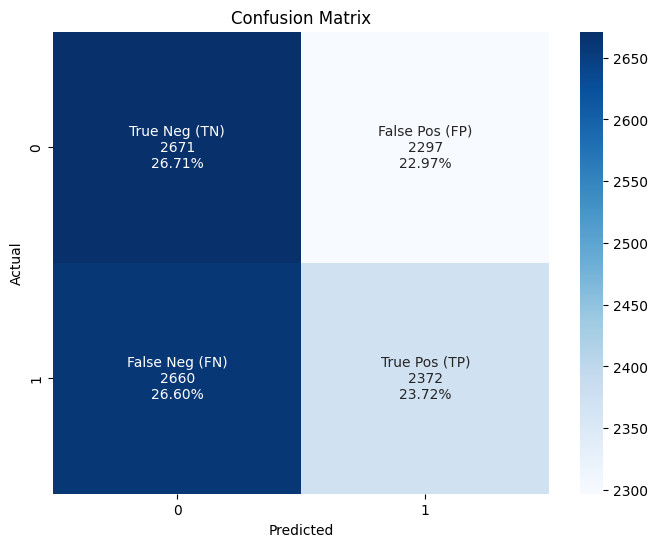

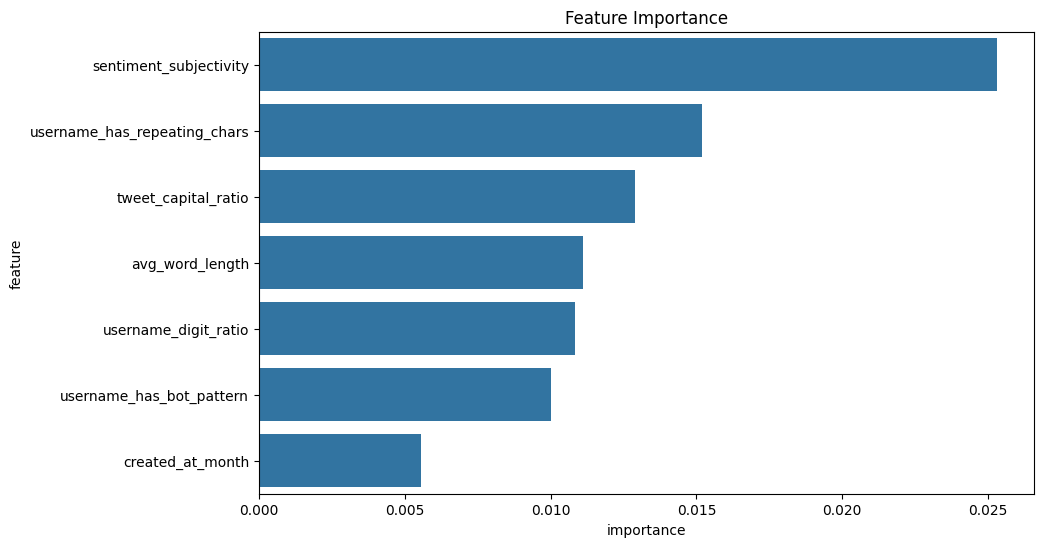

In [45]:
from sklearn.metrics import roc_curve, confusion_matrix

def plot_roc_curve(y_test, y_pred_proba):
    """Plot ROC curve with AUC score."""
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_test, y_pred):
    """Plot confusion matrix heatmap with TP, FP, TN, FN labels."""
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    
    # Create labels with counts
    group_names = ['True Neg (TN)', 'False Pos (FP)',
                  'False Neg (FN)', 'True Pos (TP)']
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def plot_feature_importance(model, feature_names):
    """Plot feature importance bars."""
    plt.figure(figsize=(10, 6))
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': abs(model.coef_[0])
    }).sort_values('importance', ascending=False)
    
    sns.barplot(data=importance, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.show()

def plot_model_evaluation(model, X_test, y_test, feature_names):
    """Generate all evaluation plots."""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    plot_roc_curve(y_test, y_pred_proba)
    plot_confusion_matrix(y_test, y_pred)
    plot_feature_importance(model, feature_names)

# Generate all plots
plot_model_evaluation(model, X_test, y_test, X.columns)

## Conclusion

- The Logistic Regression model achieved an accuracy of 0.50 and 0.50 AUC score.
- The model performed poorly due to the complexity of the problem and the limitations of the dataset.
- Further improvements could be made by using more advanced machine learning techniques and additional data sources.